# **Case Study on Probability for Data Science**

**To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)Also, if some data pre-processing is necessary do that as well.**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [76]:
dataset=pd.read_csv('mushrooms.csv')
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### No missing values present in dataset

### but the stalk root column has a '?' value for missing values

In [78]:
dataset['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [79]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## **<u>Observation:</u>**
**1)Preprocessing is done on 'stalk-root' column as it contains a '?' for missing values, as the feature columns has no null values.**
**<p>2)But we cant blindly take the mode value of the column, instead we can replacing it with 'Un-identified'</p>**

In [80]:
dataset['stalk-root'].replace({"?": "Un-identified"}, inplace=True)

In [81]:
dataset['stalk-root'].unique()

array(['e', 'c', 'b', 'r', 'Un-identified'], dtype=object)

# Encoding of columns - Onehot encoding for columns with more than two categories(cols1) and label encoding for columns with 2 categories(cols2)

In [82]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [83]:
dataset.nunique()>2

class                       False
cap-shape                    True
cap-surface                  True
cap-color                    True
bruises                     False
odor                         True
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                   True
stalk-shape                 False
stalk-root                   True
stalk-surface-above-ring     True
stalk-surface-below-ring     True
stalk-color-above-ring       True
stalk-color-below-ring       True
veil-type                   False
veil-color                   True
ring-number                  True
ring-type                    True
spore-print-color            True
population                   True
habitat                      True
dtype: bool

In [84]:
cols1=['cap-shape','cap-surface','cap-color','odor','gill-color','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']

In [85]:
cols2=['class','bruises','gill-attachment', 'gill-spacing', 'gill-size','stalk-shape','veil-type']

In [86]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

### label encoding cols2

In [87]:
dataset[cols2] = dataset[cols2].apply(label_en.fit_transform)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int32 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   int32 
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   int32 
 7   gill-spacing              8124 non-null   int32 
 8   gill-size                 8124 non-null   int32 
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   int32 
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### one hot encoding on cols1

In [88]:
data=pd.get_dummies(dataset,columns=cols1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 113 entries, class to habitat_w
dtypes: int32(7), uint8(106)
memory usage: 1.0 MB


In [89]:
data.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type,cap-shape_b,cap-shape_c,cap-shape_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### the dataset is now completely encoded

## Setting "class" as target and rest of the columns as features to build the ML models.

In [90]:
x=data.drop("class",axis=1)
y=data["class"]

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

## 1. a)Gaussian Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [93]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

### Performance metrics of the Model 

In [94]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

Mis_class=cm[0,1]+cm[1,0]

p_GNB=pd.DataFrame([acc,Mis_class])
p_GNB.columns=['Gaussian Naive Bayes']


In [95]:
print('the accuracy score of the Gaussian Naive-Bayes Classifier is:',acc)
cm

the accuracy score of the Gaussian Naive-Bayes Classifier is: 0.9513846153846154


array([[764,  79],
       [  0, 782]], dtype=int64)

### Naïve Bayes’ Classifier- other flavors

## 1. b)Bernoulli Naive Bayes

In [96]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

Mis_class=cm[0,1]+cm[1,0]

p_BNB=pd.DataFrame([acc,Mis_class])
p_BNB.columns=['Bernoulli Naive Bayes']

In [97]:
print('the accuracy score of the Bernoulli Naive-Bayes Classifier is:',acc)
cm

the accuracy score of the Bernoulli Naive-Bayes Classifier is: 0.9347692307692308


array([[838,   5],
       [101, 681]], dtype=int64)

## 1. c)Multinomial Naive Bayes

In [98]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

Mis_class=cm[0,1]+cm[1,0]

p_MNB=pd.DataFrame([acc,Mis_class])
p_MNB.columns=['Multinomial Naive Bayes']

In [99]:
print('the accuracy score of the Multinomial Naive-Bayes Classifier is:',acc)
cm

the accuracy score of the Multinomial Naive-Bayes Classifier is: 0.9483076923076923


array([[841,   2],
       [ 82, 700]], dtype=int64)

### Applying other ML Algorithms on predicting the class

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

## 2. Random Forest Method

In [101]:
rf=RandomForestClassifier(n_estimators=200,max_depth=50,random_state=42,criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]

p_rf=pd.DataFrame([acc,Mis_class])
p_rf.columns=['Random Forest Method']

print('the accuracy score of Random Forest Method is:',acc)
cm



the accuracy score of Random Forest Method is: 1.0


array([[843,   0],
       [  0, 782]], dtype=int64)

## 3. Logistic Regression

In [102]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)


cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]

p_lr=pd.DataFrame([acc,Mis_class])
p_lr.columns=['logistic regression'] 

print('the accuracy score of the logistic regression is:',acc)
cm

the accuracy score of the logistic regression is: 1.0


array([[843,   0],
       [  0, 782]], dtype=int64)

## 4. K-NN Model

In [103]:
#finding optimum value of K
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

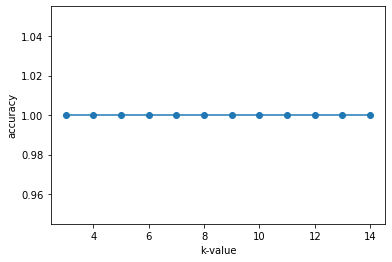

In [104]:
#Optimum Value of K
plt.plot(neighbors,acc_values,"o-")
plt.xlabel('k-value')
plt.ylabel('accuracy')

### optimum value of k=2

In [105]:
classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]
acc=accuracy_score(y_test,y_pred)

p_knn=pd.DataFrame([acc,Mis_class])
p_knn.columns=['K-NN Model']
print('the accuracy score of K-NN Model is:',acc)
cm


the accuracy score of K-NN Model is: 1.0


array([[843,   0],
       [  0, 782]], dtype=int64)

## 5. SVM- Radial

In [106]:
from sklearn.svm import SVC
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]
acc=accuracy_score(y_test,y_pred)

p_svmr=pd.DataFrame([acc,Mis_class])
p_svmr.columns=['Radial SVM']
print('the accuracy score of Radial SVM is:',acc)
cm

the accuracy score of Radial SVM is: 1.0


array([[843,   0],
       [  0, 782]], dtype=int64)

## 6. SVM-Polynomial

In [107]:
svm_radial=SVC(kernel='poly',degree=3)
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]
acc=accuracy_score(y_test,y_pred)

p_svmp=pd.DataFrame([acc,Mis_class])
p_svmp.columns=['Polynomial-SVM']

print('the accuracy score of the Polynomial-SVM is:',acc)
cm


the accuracy score of the Polynomial-SVM is: 1.0


array([[843,   0],
       [  0, 782]], dtype=int64)

## 7. Linear SVM

In [108]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]

p_svml=pd.DataFrame([acc,Mis_class])
p_svml.columns=['Linear-SVM']

print('accuracy:',accuracy_score(y_test,y_pred))
cm

accuracy: 1.0


array([[843,   0],
       [  0, 782]], dtype=int64)

## 8. Gradient Boosting

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]

p_GB=pd.DataFrame([acc,Mis_class])
p_GB.columns=['Gradient Boosting']

print('accuracy:',accuracy_score(y_test,y_pred))
cm

accuracy: 1.0


array([[843,   0],
       [  0, 782]], dtype=int64)

## 9. Extreme Gradient Boosting

In [110]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]

p_EGB=pd.DataFrame([acc,Mis_class])
p_EGB.columns=['Extreme Gradient Boosting']

print('accuracy:',accuracy_score(y_test,y_pred))
cm


[21:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 1.0


array([[843,   0],
       [  0, 782]], dtype=int64)

# Comparison:

In [111]:
performance_comparison=pd.concat([p_GNB,p_BNB,p_MNB,p_rf,p_lr,p_knn,p_svmr,p_svmp,p_svml,p_GB,p_EGB],axis=1)
performance_comparison['Performance Metrics']=['Accuracy Score','Mis-Classifications in prediction of test points']
performance_comparison=performance_comparison.set_index('Performance Metrics')
performance_comparison

,Gaussian Naive Bayes,Bernoulli Naive Bayes,Multinomial Naive Bayes,Random Forest Method,logistic regression,K-NN Model,Radial SVM,Polynomial-SVM,Linear-SVM,Gradient Boosting,Extreme Gradient Boosting
Performance Metrics,,,,,,,,,,,
Accuracy Score,0.951385,0.934769,0.948308,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Mis-Classifications in prediction of test points,79.000000,106.000000,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Compared to Naive-Bayes classifiers, all other ML Models performed much better. They have 100% accuracy and made no mis-classificattions.